# 1 Load data and Api

In [2]:
from  utils.coco_text import  coco_text
%load_ext autoreload
%autoreload 2

ct = coco_text.COCO_Text('data/COCO_Text.json')
ct.info()

loading annotations into memory...
0:00:01.811746
creating index...
index created!
url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Example

In [4]:
dataDir = "/home/andrzej/PycharmProjects/OCR/data"
dataType='train2014'

imgIds = ct.getImgIds(imgIds=ct.train,
                    # catIds=[('legibility','legible')
                              catIds=[('legibility','legible'),('class','handwritten')
                            ]
                      )
img = ct.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# img = ct.loadImgs(162700)[0] # handwritten

img = ct.loadImgs(498601)[0]
img

{'width': 640,
 'file_name': 'COCO_train2014_000000498601.jpg',
 'set': 'val',
 'id': 498601,
 'height': 427}

We can now load the image

[{'polygon': [192.89893913269043, 219.93053245544434, 237.87370491027832, 219.93053245544434, 237.87370491027832, 249.9038486480713, 192.89893913269043, 249.9038486480713], 'language': 'english', 'area': 1348.0428753409797, 'id': 1148291, 'utf8_string': 'N23FK', 'image_id': 498601, 'bbox': [192.89893913269043, 219.93053245544434, 44.97476577758789, 29.973316192626953], 'legibility': 'legible', 'class': 'machine printed'}]


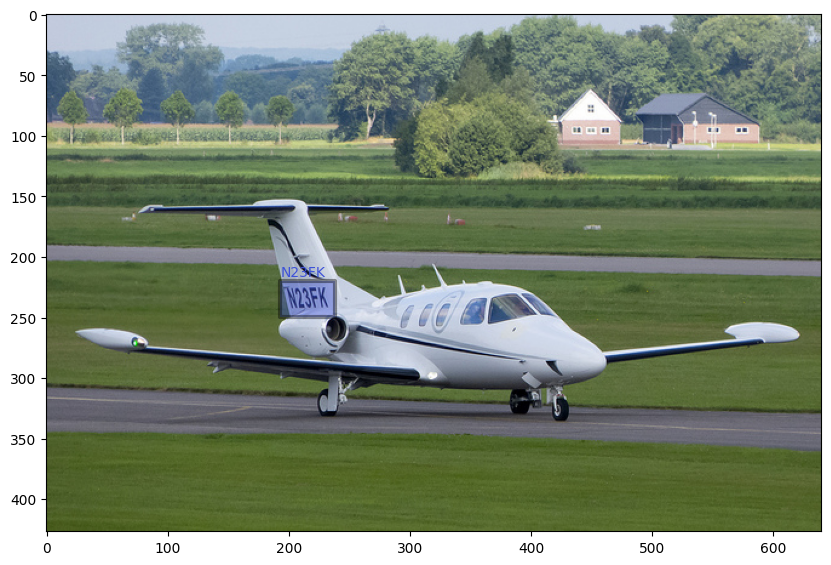

In [5]:
img_path = '%s/%s/%s'%(dataDir,dataType,img['file_name'])
I = io.imread(img_path)
plt.imshow(I)
annIds = ct.getAnnIds(imgIds=img['id'])
anns = ct.loadAnns(annIds)
print(anns)
ct.showAnns(anns)

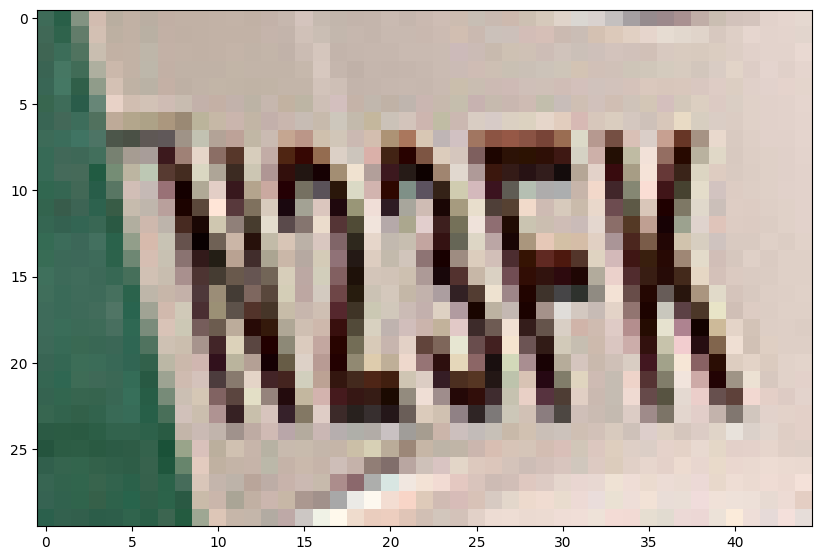

In [72]:
plt.imshow(image_org[ 219:219+30,192: 192 + 45,:])

# Model

EAST

In [73]:
from utils.detect.east import  east_detect
from utils.filters import median_filtering, bilateral_filtering, gaussian_blurring, to_threshold_binary
import cv2

image_org = cv2.imread(img_path)
image = image_org.copy()

image = to_threshold_binary(image_org)
# image = median_filtering(image)

bbox = east_detect(image)
# plt.imshow(image,cmap='gray', vmin=0, vmax=255)
# plt.imshow(out_imag,cmap='gray', vmin=0, vmax=255)
# cv2.imwrite("sample_output_threshold.png", out_imag)
bbox[0]

(427, 640)
(198, 220) (224, 246)


[198, 220, 26, 26]

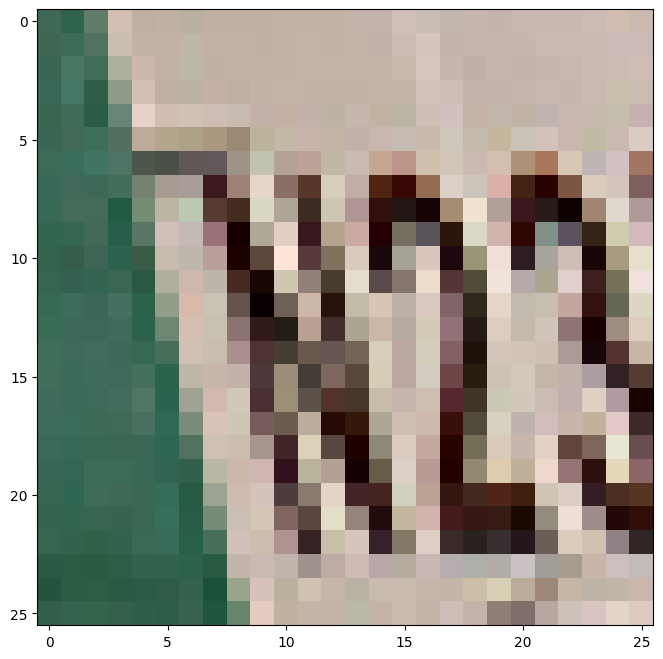

In [74]:
plt.imshow(image_org[ 220:220+26,192: 192 + 26,:])

Craft

Loading weights from checkpoint (saved_models/craft_mlt_25k.pth)
elapsed time : 2.0451648235321045s
[196 225  39  20]


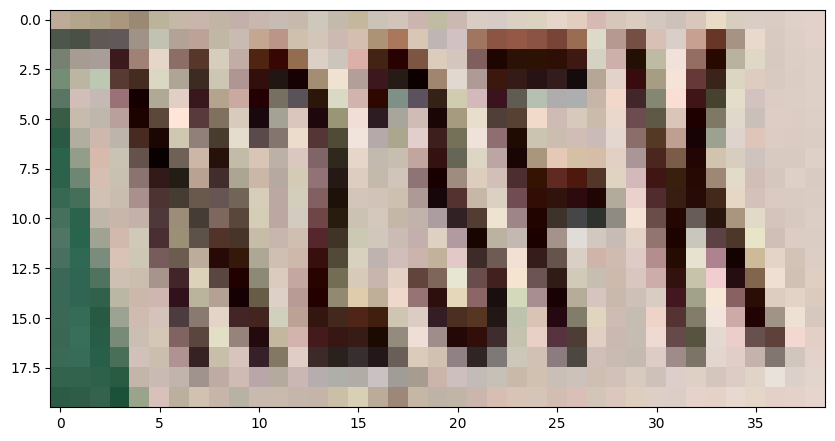

In [104]:
from utils.detect.craft_main import craft_main
bboxes = craft_main(image_org.copy(),"saved_models/craft_mlt_25k.pth")
bbox = bboxes[0]
print(bbox)
plt.imshow(image_org[ bbox[1]:bbox[1] + bbox[3],bbox[0]:bbox[0]+bbox[2],:])

# 3 Evaluation API

In [9]:
from coco_text import coco_evaluation
our_results = ct.loadRes('our_results_test.json')
list(our_results.imgs.keys())


ModuleNotFoundError: No module named 'coco_text'

### Detection results

In [ ]:
our_detections = coco_evaluation.getDetections(ct, our_results,imgIds=list(our_results.imgs.keys()), detection_threshold =0.5)
# our_detections
print('True positives have a ground truth id and an evaluation id: ', our_detections['true_positives'][0])
print('False positives only have an evaluation id: ', our_detections['false_positives'][0] if len(our_detections['false_positives']) > 1 else [])
print('True negatives only have a ground truth id: ', our_detections['false_negatives'][0] if len(our_detections['false_negatives']) > 1 else [])

### End-to-end results

In [ ]:
our_endToEnd_results = coco_evaluation.evaluateEndToEnd(ct, our_results,imgIds=list(our_results.imgs.keys()), detection_threshold = 0.5)
coco_evaluation.printDetailedResults(ct,our_detections,our_endToEnd_results,'our approach')
